In [1]:
import glob
import numpy as np
import librosa
import os
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import vega
import altair as alt
import pandas as pd
import scipy.signal
import scipy.fftpack as fft
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


2489
2489
2766
2766
2489


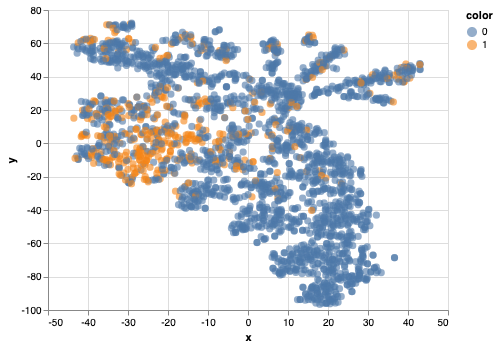

In [4]:
# #File reading
# print('File reading...')
# all_dirs = []
# for root, dirs, files in os.walk('./Dataset'):
#         for name in files:
#             if '.wav' in name:
#                 filedir = os.path.join(root, name)
#                 all_dirs.append(filedir)
# file_no = len(all_dirs)
# print('Number of files: ' + str(file_no))

# #Feature Computation
# print('Feature Computation...')
# all_db = []
# all_mean = []
# file_names = []

# for i in range(file_no):
#     if (librosa.get_duration(filename=all_dirs[i]) == 15.):
#         file_names.append(all_dirs[i])
#         #Progress report
#         if (i==file_no-1):
#             print('100%')
#         elif (i==int(file_no*0.75)):
#             print('75%')
#         elif (i==int(file_no*0.5)):
#             print('50%')
#         elif (i==int(file_no*0.25)):
#             print('25%')
#         #Load file
#         y, sr = librosa.core.load(all_dirs[i], duration=15.)
#         #Features
#         S = librosa.core.stft(y=y)
#         S_db = librosa.core.power_to_db(np.abs(S)**2)
#         all_mean.append(np.mean(S_db)) 
        
#         S_mel = librosa.feature.melspectrogram(y=y, sr=sr)
#         all_db.append(S_mel.flatten()) 
# feature_no = len(all_db[0])      

# print('Number of files with a duration of 15 seconds: ' + str(len(file_names)))

# #Collection-based
# collection = []
# for i in range(len(file_names)):
#     if 'ArabMashriq' in file_names[i]:
#         collection.append(0)
#     elif 'EisenbergCollection' in file_names[i]:
#         collection.append(1)

# X_train, X_test, y_train, y_test, z_train, z_test, a_train, a_test = train_test_split(np.asarray(all_db), np.asarray(file_names), np.asarray(all_mean), np.asarray(collection), test_size=0.1, random_state=42)

# print('>>> Split went fine...!')
# #Autoencoder (2000, 100, 50, 100, 2000, input)
# input_db = Input(shape=(feature_no,))
# encoded = Dense(2000, activation='relu')(input_db)
# encoded = Dense(100, activation='relu')(encoded)
# encoded = Dense(50, activation='relu')(encoded)
# decoded = Dense(100, activation='relu')(encoded)
# decoded = Dense(2000, activation='relu')(decoded)
# decoded = Dense(feature_no, activation='relu')(decoded)

# autoencoder = Model(input_db, decoded)
# encoder = Model(input_db, encoded)
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
# autoencoder.fit(X_train, X_train,
#                 epochs=50,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_split = 0.2,
#                 validation_data=(X_test, X_test))

# encoded_db = encoder.predict(X_train)


# #Standardization
# scl1 = StandardScaler()
# all_db_scaled = scl1.fit_transform(encoded_db)

# #TSNE
# db_red2 = TSNE(n_components=2).fit_transform(all_db_scaled)

# #KMeans
# kmeans = KMeans(n_clusters=10, random_state=0).fit(db_red2)
# clusters = kmeans.predict(db_red2)


#x and y
db1 = []
db2 = []
for i in range(len(db_red2)):
    db1.append(db_red2[i][0])
    db2.append(db_red2[i][1])
print(len(db1))
print(len(db2))
# print(clusters.shape)
print(len(all_mean))
print(len(collection))
print(len(a_train))

#Visualization

# #Clusters
# df1 = pd.DataFrame({'x': np.asarray(db1), 'y': np.asarray(db2), 'color': clusters, 'path': np.asarray(y_train), 'filename': np.asarray(y_train)})
# chart1 = alt.Chart(df1).mark_circle(opacity=0.6, size=50).encode(x='x', y='y', color='color:N', href='path', tooltip=['filename']).interactive()

# #Intensity
# df2 = pd.DataFrame({'x': np.asarray(db1), 'y': np.asarray(db2), 'color': z_train, 'path': np.asarray(y_train), 'filename': np.asarray(y_train)})
# chart2 = alt.Chart(df2).mark_circle(opacity=0.6, size=50).encode(x='x', y='y', color='color:Q', href='path', tooltip=['filename']).interactive()

# #Combined
# df3 = pd.DataFrame({'x': np.asarray(db1), 'y': np.asarray(db2), 'color': clusters, 'path': np.asarray(y_train), 'filename': np.asarray(y_train)})
# chart3 = alt.Chart(df3).mark_circle(size=80).encode(x='x', y='y', color='color:N', href='path', tooltip=['filename']).interactive()
# df4 = pd.DataFrame({'x': np.asarray(db1), 'y': np.asarray(db2), 'color': z_train, 'path': np.asarray(y_train), 'filename': np.asarray(y_train)})
# chart4 = alt.Chart(df4).mark_circle(size=30).encode(x='x', y='y', color='color:Q', href='path', tooltip=['filename']).interactive()

#Collections
df5 = pd.DataFrame({'x': np.asarray(db1), 'y': np.asarray(db2), 'color': a_train, 'path': np.asarray(y_train), 'filename': np.asarray(y_train)})
chart5 = alt.Chart(df5).mark_circle(opacity=0.6, size=50).encode(x='x', y='y', color='color:N', href='path', tooltip=['filename']).interactive()

# display(chart1)
# display(chart2)
# display(chart3 + chart4)
display(chart5)